## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [27]:
#libraries
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#load dataset
ds = "files/cleaned_ecommerce_dataset.csv"
df = pd.read_csv(ds)

In [16]:
#Print length of dataframe
print(len(df))

2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [17]:
#Show rows of dataframe
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [18]:
#Info of dataframe
df.info

<bound method DataFrame.info of       userId  timestamp                                           review  \
0       4081      71900                                Not always McCrap   
1       4081      72000  I dropped the chalupa even before he told me to   
2       4081      72000                     The Wonderful World of Wendy   
3       4081     100399                             They actually did it   
4       4081     100399                             Hey! Gimme some pie!   
...      ...        ...                                              ...   
2680    2445      22000                                     Great movie!   
2681    2445      30700                                       Good food!   
2682    2445      61500                                     Great movie!   
2683    2445     100500                                    Awesome Game.   
2684    2445     101400                                   Great Service.   

                                           item  rating

In [34]:
#Encoder
encoder = OrdinalEncoder()

#Implementing correlation
col = ["gender", "category", "review"]
df[col] = encoder.fit_transform(df[col])
corr = df.corr(numeric_only=True).abs()

#Print data
print(corr)

               userId  timestamp    review      item    rating  helpfulness  \
userId       1.000000   0.065530  0.007427  0.005822  0.033327     0.164870   
timestamp    0.065530   1.000000  0.007029  0.003543  0.000369     0.014179   
review       0.007427   0.007029  1.000000  0.163090  0.036118     0.028259   
item         0.005822   0.003543  0.163090  1.000000  0.043388     0.020433   
rating       0.033327   0.000369  0.036118  0.043388  1.000000     0.007523   
helpfulness  0.164870   0.014179  0.028259  0.020433  0.007523     1.000000   
gender       0.056342   0.003367  0.037884  0.001925  0.034337     0.075947   
category     0.037127   0.015009  0.001970  0.045988  0.163158     0.013408   
item_id      0.005822   0.003543  0.163090  1.000000  0.043388     0.020433   
item_price   0.021375   0.010979  0.041421  0.049885  0.027374     0.004112   
user_city    0.043083   0.014934  0.045626  0.005220  0.028825     0.012086   

               gender  category   item_id  item_pri

In [35]:
#Ordering rating correlation
corr_rating = corr['rating']
sorted = corr_rating.sort_values(ascending=False)

#Print ordered rating correlation
print(sorted)

rating         1.000000
category       0.163158
item_id        0.043388
item           0.043388
review         0.036118
gender         0.034337
userId         0.033327
user_city      0.028825
item_price     0.027374
helpfulness    0.007523
timestamp      0.000369
Name: rating, dtype: float64


### Analysis

Most Correlated: item_id

Least Correlated: category

There are more negative correlations in comparison to positive correlations within the dataset. This therfore means that the predictive model is more inclined to be faulty as the negative correlation data will negatively affect and even degrade the model. There are however nuetral values like timestamp which will not signifcantly improve or degrade the model.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [61]:
# Case 1: 10% of the data for training
train_case1, test_case1 = train_test_split(df, train_size=0.1, random_state=142)

# Case 2: 90% of the data for training
train_case2, test_case2 = train_test_split(df, train_size=0.9, random_state=142)

# Printing 
print("Case 1:")
print("Training set shape:", train_case1.shape)
print("Testing set shape:", test_case1.shape)
print("\nCase 2:")
print("Training set shape:", train_case2.shape)
print("Testing set shape:", test_case2.shape)

Case 1:
Training set shape: (268, 11)
Testing set shape: (2417, 11)

Case 2:
Training set shape: (2416, 11)
Testing set shape: (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [62]:
features_most_corr = ["category", "review"]
features_least_corr = ["gender", "helpfulness"]

# Define function to train and evaluate a linear regression model
def train_and_evaluate_model(features, train_data, test_data):
    X_train = train_data[features]
    y_train = train_data["rating"]
    X_test = test_data[features]
    y_test = test_data["rating"]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    return model, score

# Train and evaluate the models
model_a, score_a = train_and_evaluate_model(features_most_corr, train_case1, test_case1)
model_b, score_b = train_and_evaluate_model(features_least_corr, train_case1, test_case1)
model_c, score_c = train_and_evaluate_model(features_most_corr, train_case2, test_case2)
model_d, score_d = train_and_evaluate_model(features_least_corr, train_case2, test_case2)

# Print the model performance scores
print("Model A (Most Correlated Features) Score:", score_a)
print("Model B (Least Correlated Features) Score:", score_b)
print("Model C (Most Correlated Features) Score:", score_c)
print("Model D (Least Correlated Features) Score:", score_d)

Model A (Most Correlated Features) Score: 0.020578145218415278
Model B (Least Correlated Features) Score: -0.019383789895821568
Model C (Most Correlated Features) Score: 0.022040319944943154
Model D (Least Correlated Features) Score: -0.006899007486201425


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [63]:
# Define function to train and evaluate a linear regression model
def train_and_evaluate_model(features, train_data, test_data):
    X_train = train_data[features]
    y_train = train_data["rating"]
    X_test = test_data[features]
    y_test = test_data["rating"]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return model, mse, rmse

# Train and evaluate the models
model_a, mse_a, rmse_a = train_and_evaluate_model(features_most_corr, train_case1, test_case1)
model_b, mse_b, rmse_b = train_and_evaluate_model(features_least_corr, train_case1, test_case1)
model_c, mse_c, rmse_c = train_and_evaluate_model(features_most_corr, train_case2, test_case2)
model_d, mse_d, rmse_d = train_and_evaluate_model(features_least_corr, train_case2, test_case2)

# Print the results
print("Model A (Most Correlated Features) - MSE:", mse_a, "RMSE:", rmse_a)
print("Model B (Least Correlated Features) - MSE:", mse_b, "RMSE:", rmse_b)
print("Model C (Most Correlated Features) - MSE:", mse_c, "RMSE:", rmse_c)
print("Model D (Least Correlated Features) - MSE:", mse_d, "RMSE:", rmse_d)

Model A (Most Correlated Features) - MSE: 1.7690740179517055 RMSE: 1.3300654186737229
Model B (Least Correlated Features) - MSE: 1.8412549895856636 RMSE: 1.356928513071217
Model C (Most Correlated Features) - MSE: 1.758897535980505 RMSE: 1.3262343442923294
Model D (Least Correlated Features) - MSE: 1.8109460127732369 RMSE: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

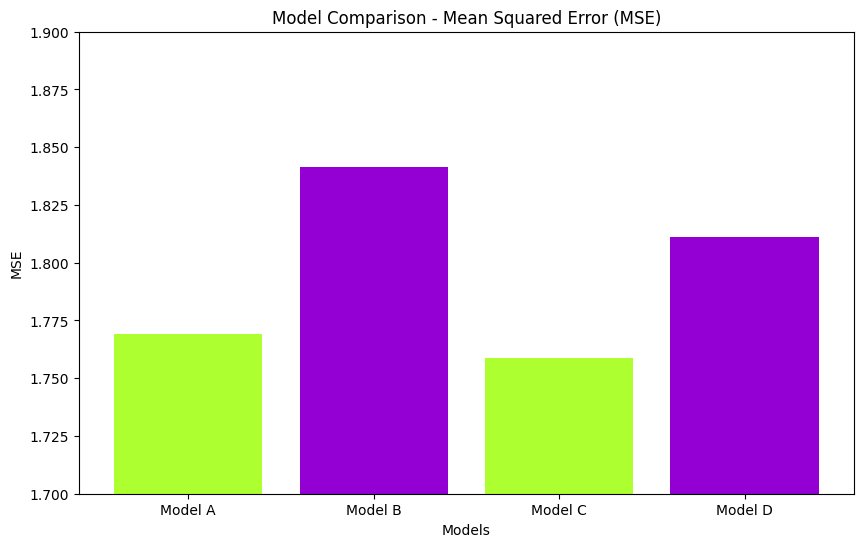

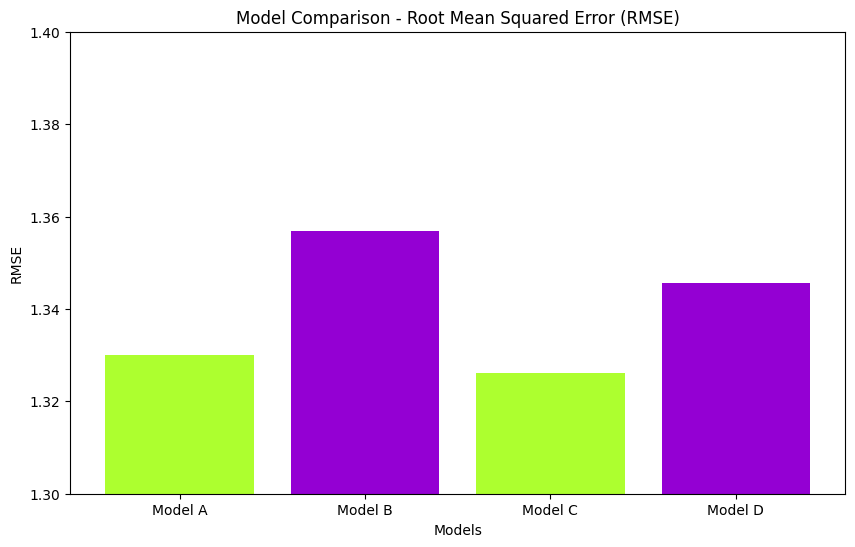

In [67]:
# Define the models and their corresponding MSE and RMSE values
models = ['Model A', 'Model B', 'Model C', 'Model D']
mse_values = [mse_a, mse_b, mse_c, mse_d]
rmse_values = [rmse_a ,rmse_b ,rmse_c ,rmse_d]

# Create a bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, capsize=5, color=['greenyellow', 'darkviolet', 'greenyellow', 'darkviolet'])
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(1.7, 1.9)  # Set the y-axis scale
plt.show()

# Create a bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, capsize=5, color=['greenyellow', 'darkviolet', 'greenyellow', 'darkviolet'])
plt.title('Model Comparison - Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(1.3, 1.4)  # Set the y-axis scale
plt.show()

### MSE Comparison

Model A and Model C have lower mean squared error values than Model B and Model D.
In comparison to the training data of case 2 should result in better performance. However, Model A and Model C who contains case 1 values with fewer data points is seen to outperform Model B and Model D. This is completely different from the understanding that better data produces a better model.

### RMSE Comparison

The rooted mean squared error results follow a similar pattern to mean squared error. Model A and Model C have lower rooted mean squared error values compared to Model B and Model D..

### General Observation

The most critical factor impacting model performance in this case seems to be feature selection. Selecting the most correlated features leads to better performance compared to selecting the least correlated features (Models B and D). This suggests that feature quality and relevance play a significant role in linear regression model performance.

While it's commonly assumed that more data leads to better performance, the observed results may be due to various factors. It's also possible that case 1 contained more informative data points or that case 2 introduced more noise or outliers.